# Import libraries

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statistics 
from scipy.stats import mode 
import scipy 
from mlxtend.preprocessing import TransactionEncoder 
import seaborn as sns

# Import data set

In [50]:
dataset = pd.read_csv('groceries.csv')

x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

dataset

,Item,0,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
print(x)
print(y)
dataset.describe()

[['citrus fruit' 'semi-finished bread' 'margarine' ... nan nan nan]
 ['tropical fruit' 'yogurt' 'coffee' ... nan nan nan]
 ['whole milk' nan nan ... nan nan nan]
 ...
 ['chicken' 'citrus fruit' 'other vegetables' ... nan nan nan]
 ['semi-finished bread' 'bottled water' 'soda' ... nan nan nan]
 ['chicken' 'tropical fruit' 'other vegetables' ... nan nan nan]]
[ 4  3  1 ... 10  4  5]


,Item
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


# Data understanding and visualisation

In [52]:
dataset = pd.read_csv('groceries.csv')

dataset = dataset.drop(columns = 'Item')

dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,9835,7676,6033,4734,3729,2874,2229,1684,1246,896,...,14,8,7,7,6,5,4,1,1,1
unique,158,151,155,153,150,137,138,140,128,120,...,13,7,6,7,5,4,3,1,1,1
top,sausage,whole milk,whole milk,whole milk,rolls/buns,soda,soda,shopping bags,soda,shopping bags,...,waffles,bottled beer,chocolate,shopping bags,hygiene articles,napkins,house keeping products,skin care,hygiene articles,candles
freq,825,654,506,315,176,150,120,76,61,49,...,2,2,2,1,2,2,2,1,1,1


In [53]:
dataset.isnull().sum()

0        0
1     2159
2     3802
3     5101
4     6106
5     6961
6     7606
7     8151
8     8589
9     8939
10    9185
11    9367
12    9484
13    9562
14    9639
15    9694
16    9740
17    9769
18    9783
19    9797
20    9806
21    9817
22    9821
23    9827
24    9828
25    9828
26    9829
27    9830
28    9831
29    9834
30    9834
31    9834
dtype: int64

In [54]:
items = set()
for col in dataset:
    items.update(dataset[col].unique())

items = {x for x in items if x==x}

print(items)

{'mustard', 'hygiene articles', 'nut snack', 'soda', 'candy', 'whole milk', 'oil', 'hair spray', 'photo/film', 'finished products', 'frozen vegetables', 'bottled beer', 'sliced cheese', 'baking powder', 'processed cheese', 'ready soups', 'honey', 'tropical fruit', 'spices', 'toilet cleaner', 'white wine', 'cream cheese', 'instant coffee', 'beef', 'dishes', 'whisky', 'chicken', 'liquor', 'cocoa drinks', 'frozen fruits', 'jam', 'salt', 'meat spreads', 'whipped/sour cream', 'red/blush wine', 'make up remover', 'misc. beverages', 'baby cosmetics', 'bags', 'pickled vegetables', 'popcorn', 'male cosmetics', 'roll products', 'syrup', 'specialty bar', 'potted plants', 'flour', 'newspapers', 'zwieback', 'onions', 'Instant food products', 'dessert', 'detergent', 'softener', 'cling film/bags', 'ice cream', 'seasonal products', 'liquor (appetizer)', 'kitchen utensil', 'tidbits', 'butter milk', 'grapes', 'mayonnaise', 'frozen meals', 'shopping bags', 'sparkling wine', 'artif. sweetener', 'baby food

In [55]:
itemset = set(items)
encoded_vals = []
for index, row in dataset.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [56]:
ohe_df

,mustard,hygiene articles,nut snack,soda,candy,whole milk,oil,hair spray,photo/film,finished products,...,canned vegetables,dish cleaner,rubbing alcohol,other vegetables,condensed milk,meat,semi-finished bread,ready soups,citrus fruit,margarine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
9833,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
count = ohe_df.apply(pd.value_counts)
count

,mustard,hygiene articles,nut snack,soda,candy,whole milk,oil,hair spray,photo/film,finished products,...,canned vegetables,dish cleaner,rubbing alcohol,other vegetables,condensed milk,meat,semi-finished bread,ready soups,citrus fruit,margarine
0,9717,9511,9804,8120,9541,7322,9559,9824,9744,9771,...,9729,9732,9825,7932,9734,9581,9661,9817,9021,9259
1,118,324,31,1715,294,2513,276,11,91,64,...,106,103,10,1903,101,254,174,18,814,576


In [58]:
count = count.sort_values(by = 0, axis = 1)

trans = count.T
#trans.to_excel('Trans.xlsx')
count

,whole milk,other vegetables,rolls/buns,soda,yogurt,bottled water,root vegetables,tropical fruit,shopping bags,sausage,...,whisky,salad dressing,toilet cleaner,baby cosmetics,frozen chicken,bags,kitchen utensil,preservation products,baby food,sound storage medium
0,7322,7932,8026,8120,8463,8748,8763,8803,8866,8911,...,9827,9827,9828,9829,9829,9831,9831,9833,9834,9834
1,2513,1903,1809,1715,1372,1087,1072,1032,969,924,...,8,8,7,6,6,4,4,2,1,1


# Apriori algorithm

In [59]:
from mlxtend.frequent_patterns import apriori, association_rules

In [60]:
freq_items = apriori(ohe_df, min_support=(0.00386), use_colnames=True, verbose=1)
freq_items

Processing 340 combinations | Sampling itemset size 5 4


,support,itemsets
0,0.011998,(mustard)
1,0.032944,(hygiene articles)
2,0.174377,(soda)
3,0.029893,(candy)
4,0.255516,(whole milk)
...,...,...
1539,0.004372,"(other vegetables, butter, whole milk, yogurt)"
1540,0.004779,"(other vegetables, citrus fruit, whole milk, y..."
1541,0.004982,"(other vegetables, root vegetables, tropical f..."
1542,0.004474,"(other vegetables, root vegetables, citrus fru..."


In [61]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
#rules.to_excel('rules.xlsx')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rice),(whole milk),0.007626,0.255516,0.004677,0.613333,2.400371,0.002729,1.925390
1,"(tropical fruit, hygiene articles)",(whole milk),0.006711,0.255516,0.004067,0.606061,2.371909,0.002352,1.889844
2,"(root vegetables, oil)",(whole milk),0.007016,0.255516,0.004474,0.637681,2.495660,0.002681,2.054776
3,"(tropical fruit, beef)",(whole milk),0.007626,0.255516,0.004575,0.600000,2.348189,0.002627,1.861210
4,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,0.003883,2.032240
5,"(butter, tropical fruit)",(whole milk),0.009964,0.255516,0.006202,0.622449,2.436047,0.003656,1.971877
6,"(domestic eggs, tropical fruit)",(whole milk),0.011388,0.255516,0.006914,0.607143,2.376144,0.004004,1.895050
7,"(whipped/sour cream, cream cheese)",(whole milk),0.006406,0.255516,0.003965,0.619048,2.422735,0.002329,1.954270
8,"(pip fruit, cream cheese)",(whole milk),0.006101,0.255516,0.003965,0.650000,2.543872,0.002407,2.127097
9,"(domestic eggs, chicken)",(whole milk),0.006202,0.255516,0.003965,0.639344,2.502169,0.002381,2.064251


In [62]:
count = []
for i in range(len(rules['antecedents'])):
    
    count.append(len(rules['antecedents'][i]))
    
rules.insert(0,"count", count, True)
rules['antecedents'] = list(rules['antecedents'])
rules['consequents'] = list(rules['consequents'])
rules['confidence'] = list(rules['confidence'])
rules

,count,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,1,(rice),(whole milk),0.007626,0.255516,0.004677,0.613333,2.400371,0.002729,1.925390
1,2,"(tropical fruit, hygiene articles)",(whole milk),0.006711,0.255516,0.004067,0.606061,2.371909,0.002352,1.889844
2,2,"(root vegetables, oil)",(whole milk),0.007016,0.255516,0.004474,0.637681,2.495660,0.002681,2.054776
3,2,"(tropical fruit, beef)",(whole milk),0.007626,0.255516,0.004575,0.600000,2.348189,0.002627,1.861210
4,2,"(curd, tropical fruit)",(whole milk),0.010269,0.255516,0.006507,0.633663,2.479936,0.003883,2.032240
5,2,"(butter, tropical fruit)",(whole milk),0.009964,0.255516,0.006202,0.622449,2.436047,0.003656,1.971877
6,2,"(domestic eggs, tropical fruit)",(whole milk),0.011388,0.255516,0.006914,0.607143,2.376144,0.004004,1.895050
7,2,"(whipped/sour cream, cream cheese)",(whole milk),0.006406,0.255516,0.003965,0.619048,2.422735,0.002329,1.954270
8,2,"(pip fruit, cream cheese)",(whole milk),0.006101,0.255516,0.003965,0.650000,2.543872,0.002407,2.127097
9,2,"(domestic eggs, chicken)",(whole milk),0.006202,0.255516,0.003965,0.639344,2.502169,0.002381,2.064251


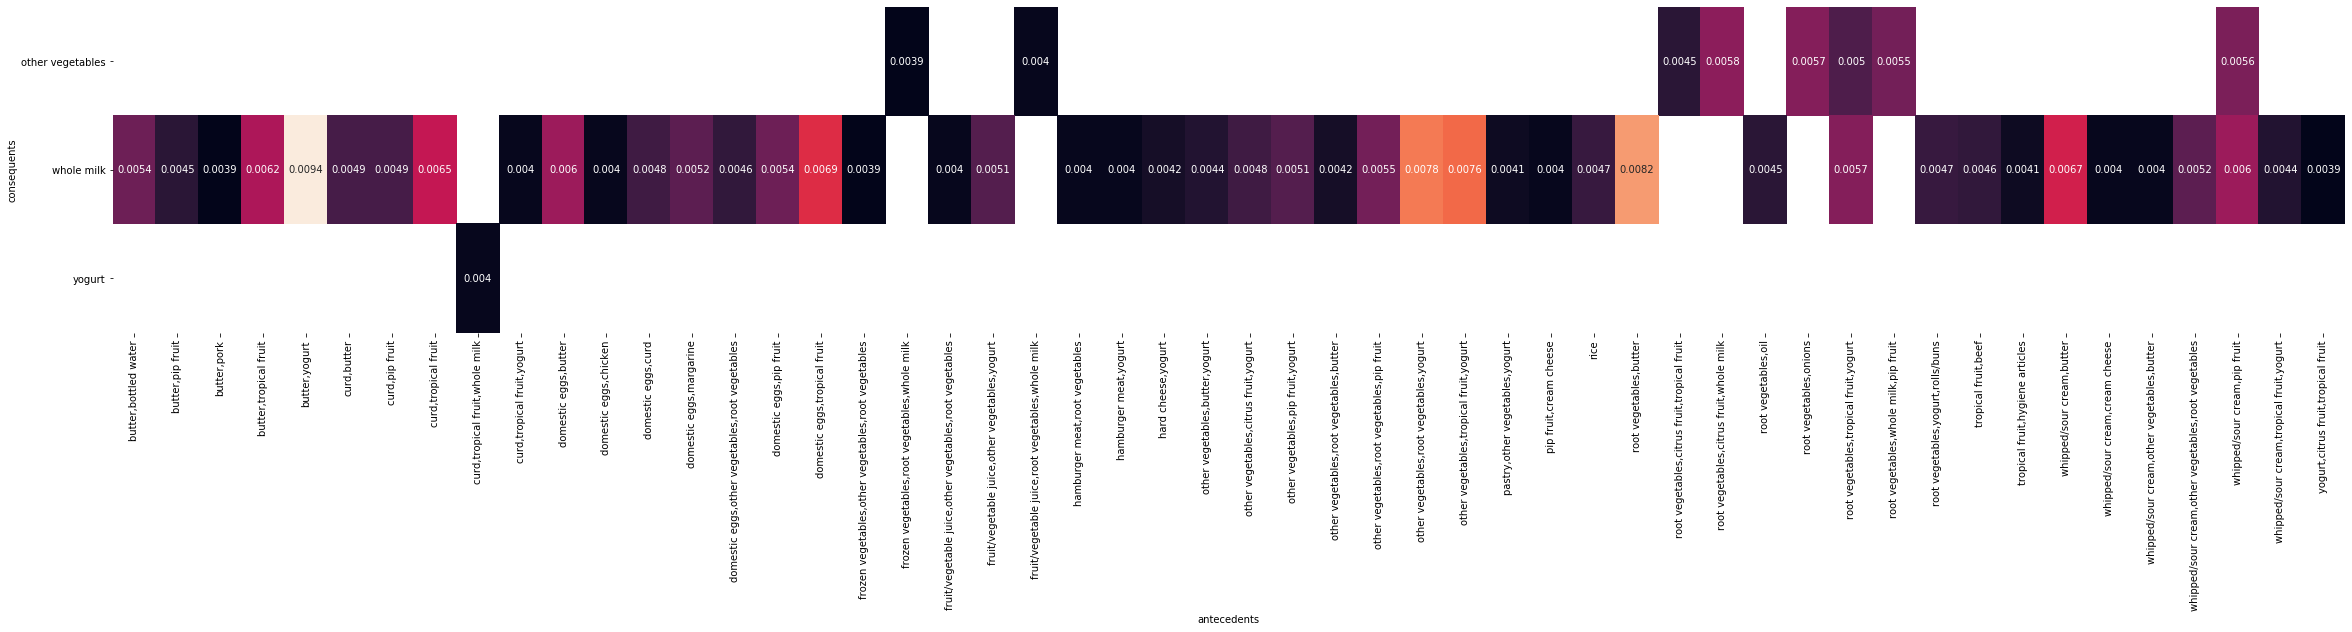

In [63]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(40,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)

#f.set_figwidth(4)
#f.set_figheight(25)
plt.savefig('heatmap1.png', transparent=True, bbox_inches='tight')
plt.show() 

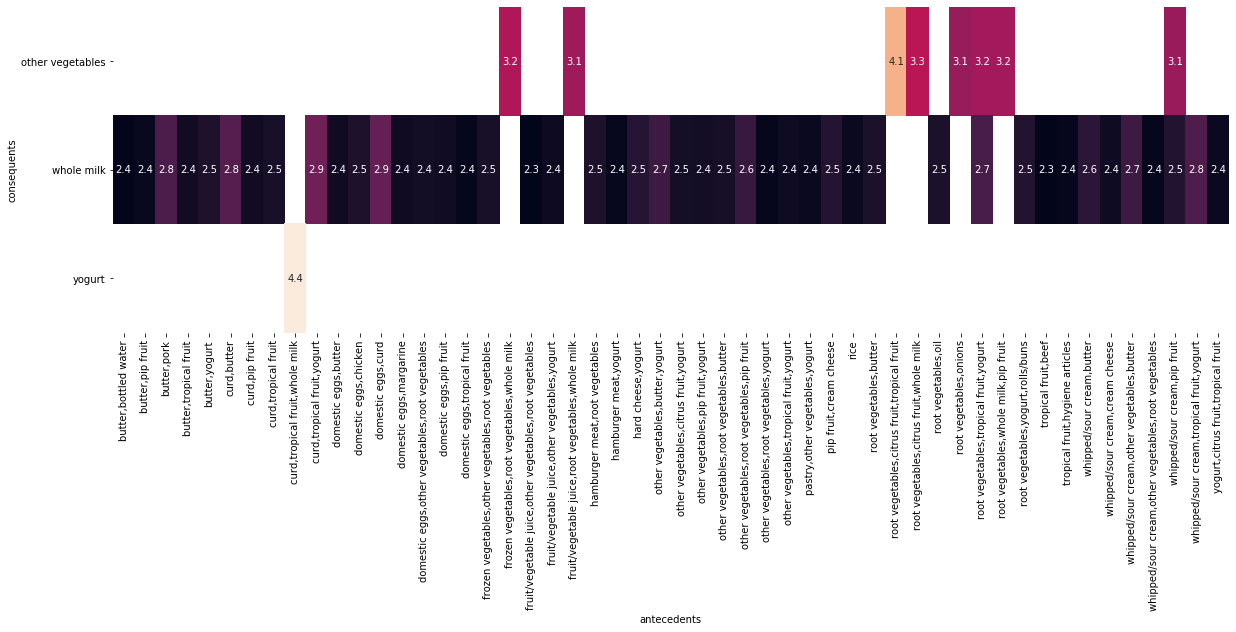

In [64]:
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(20,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig('heatmap2.png', transparent=True, bbox_inches='tight')
plt.show()

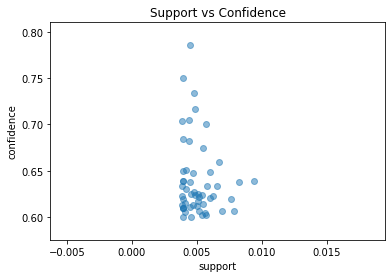

In [65]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

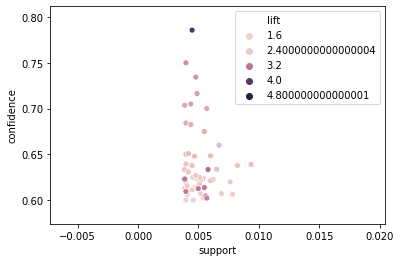

In [66]:
sns.scatterplot(rules['support'], rules['confidence'], hue=rules['lift'])
plt.savefig('cvsslift.png', transparent=True, bbox_inches='tight')

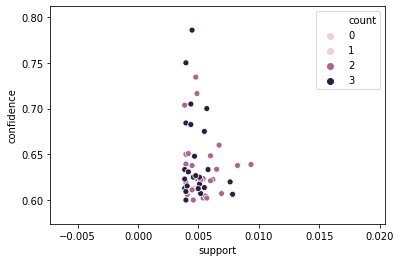

In [67]:
sns.scatterplot(rules['support'], rules['confidence'], hue=rules['count'])
plt.savefig('cvsscount.png', transparent=True, bbox_inches='tight')

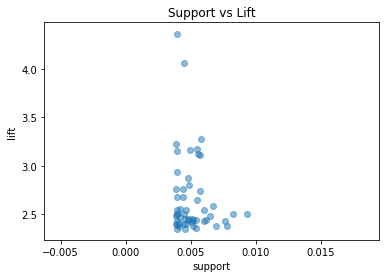

In [68]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

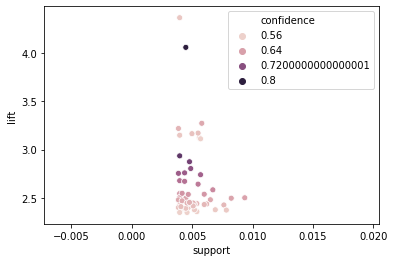

In [69]:
sns.scatterplot(rules['support'], rules['lift'], hue=rules['confidence'])
plt.savefig('lvss.png', transparent=True, bbox_inches='tight')

C:\Users\F5331811\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\F5331811\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

C:\Users\F5331811\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



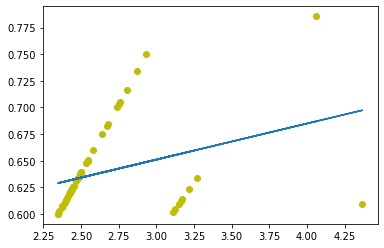

In [70]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

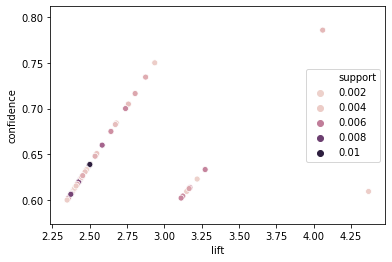

In [71]:
sns.scatterplot(rules['lift'], rules['confidence'], hue=rules['support'])
plt.savefig('cvsl.png', transparent=True, bbox_inches='tight')

In [72]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

No handles with labels found to put in legend.


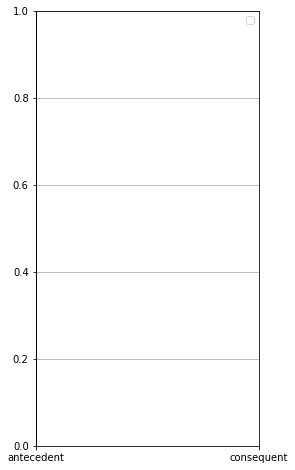

In [73]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(ohe_df, min_support = 0.15, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.55)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()

# Data visualisation

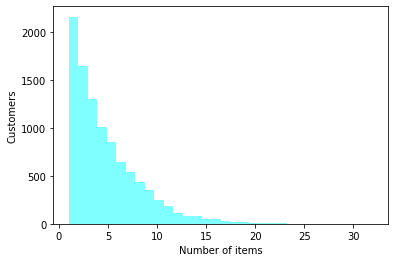

In [74]:
dataset = pd.read_csv('groceries.csv')

x = dataset.iloc[:, 0]

num_bins = 32


plt.hist(x, num_bins, facecolor='cyan', alpha=0.5)

plt.xlabel('Number of items')
plt.ylabel('Customers')

plt.savefig('item number.png', transparent=True)
plt.show()

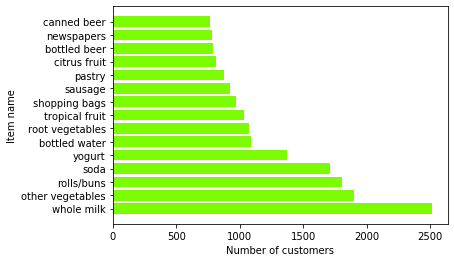

In [75]:
top = [2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924, 875, 814, 792, 785, 764]
heading = ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer']

plt.xlabel("Number of customers")
plt.ylabel("Item name")

#plt.title("The number of customers who bought an item")

plt.barh(heading, top, color = 'lawngreen')

plt.savefig('top.png', transparent=True, bbox_inches='tight')

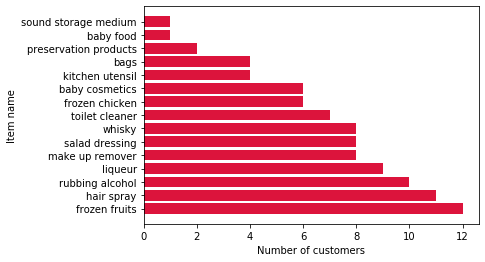

In [76]:
top = [12, 11, 10, 9, 8, 8, 8, 7, 6, 6, 4, 4, 2, 1, 1]
heading = ['frozen fruits', 'hair spray', 'rubbing alcohol', 'liqueur', 'make up remover', 'salad dressing', 'whisky', 'toilet cleaner', 'frozen chicken', 'baby cosmetics', 'kitchen utensil', 'bags', 'preservation products', 'baby food', 'sound storage medium']

plt.xlabel("Number of customers")
plt.ylabel("Item name")

plt.barh(heading, top, color = 'crimson')

plt.savefig('bottom.png', transparent=True, bbox_inches='tight')

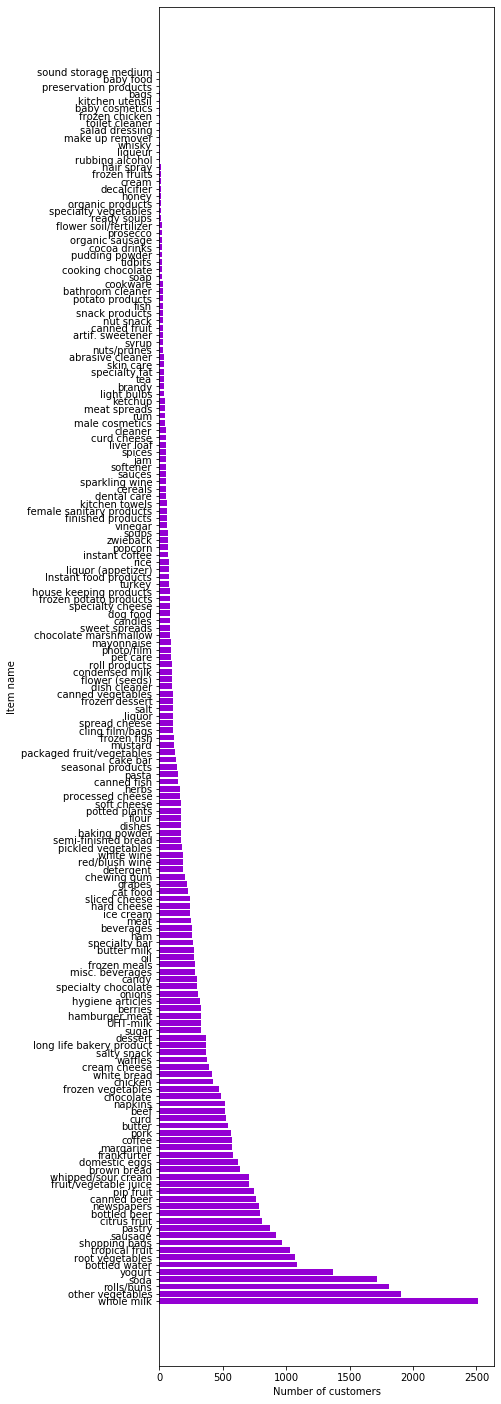

In [77]:
top = [2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924, 875, 814, 792, 785, 764, 744, 711, 705, 638, 624, 580, 576, 571, 567, 545, 524, 516, 515, 488, 473, 422, 414, 390, 378, 372, 368, 365, 333, 329, 327, 327, 324, 305, 299, 294, 279, 279, 276, 275, 269, 256, 256, 254, 246, 241, 241, 229, 220, 207, 189, 189, 187, 176, 174, 174, 173, 171, 170, 168, 163, 160, 148, 148, 140, 130, 128, 118, 115, 112, 110, 109, 106, 106, 106, 103, 102, 101, 101, 93, 91, 90, 89, 89, 88, 84, 84, 83, 82, 80, 79, 78, 75, 73, 71, 68, 67, 64, 64, 60, 59, 57, 56, 55, 54, 54, 53, 51, 50, 50, 50, 45, 44, 42, 42, 41, 41, 38, 36, 35, 35, 33, 32, 32, 32, 31, 30, 29, 28, 27, 27, 26, 25, 23, 23, 22, 22, 20, 19, 18, 17, 16, 15, 15, 13, 12, 11, 10, 9, 8, 8, 8, 7, 6, 6, 4, 4, 2, 1, 1]
heading = ['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread', 'domestic eggs', 'frankfurter', 'margarine', 'coffee', 'pork', 'butter', 'curd', 'beef', 'napkins', 'chocolate', 'frozen vegetables', 'chicken', 'white bread', 'cream cheese', 'waffles', 'salty snack', 'long life bakery product', 'dessert', 'sugar', 'UHT-milk', 'hamburger meat', 'berries', 'hygiene articles', 'onions', 'specialty chocolate', 'candy', 'misc. beverages', 'frozen meals', 'oil', 'butter milk', 'specialty bar', 'ham', 'beverages', 'meat', 'ice cream', 'hard cheese', 'sliced cheese', 'cat food', 'grapes', 'chewing gum', 'detergent', 'red/blush wine', 'white wine', 'pickled vegetables', 'semi-finished bread', 'baking powder', 'dishes', 'flour', 'potted plants', 'soft cheese', 'processed cheese', 'herbs', 'canned fish', 'pasta', 'seasonal products', 'cake bar', 'packaged fruit/vegetables', 'mustard', 'frozen fish', 'cling film/bags', 'spread cheese', 'liquor', 'salt', 'frozen dessert', 'canned vegetables', 'dish cleaner', 'flower (seeds)', 'condensed milk', 'roll products', 'pet care', 'photo/film', 'mayonnaise', 'chocolate marshmallow', 'sweet spreads', 'candles', 'dog food', 'specialty cheese', 'frozen potato products', 'house keeping products', 'turkey', 'Instant food products', 'liquor (appetizer)', 'rice', 'instant coffee', 'popcorn', 'zwieback', 'soups', 'vinegar', 'finished products', 'female sanitary products', 'kitchen towels', 'dental care', 'cereals', 'sparkling wine', 'sauces', 'softener', 'jam', 'spices', 'liver loaf', 'curd cheese', 'cleaner', 'male cosmetics', 'rum', 'meat spreads', 'ketchup', 'light bulbs', 'brandy', 'tea', 'specialty fat', 'skin care', 'abrasive cleaner', 'nuts/prunes', 'syrup', 'artif. sweetener', 'canned fruit', 'nut snack', 'snack products', 'fish', 'potato products', 'bathroom cleaner', 'cookware', 'soap', 'cooking chocolate', 'tidbits', 'pudding powder', 'cocoa drinks', 'organic sausage', 'prosecco', 'flower soil/fertilizer', 'ready soups', 'specialty vegetables', 'organic products', 'honey', 'decalcifier', 'cream', 'frozen fruits', 'hair spray', 'rubbing alcohol', 'liqueur', 'whisky', 'make up remover', 'salad dressing', 'toilet cleaner', 'frozen chicken', 'baby cosmetics', 'kitchen utensil', 'bags', 'preservation products', 'baby food', 'sound storage medium']

f = plt.figure()

plt.xlabel("Number of customers")
plt.ylabel("Item name")

plt.barh(heading, top, color = 'darkviolet')


#f.set_figwidth(4)
f.set_figheight(25)

plt.savefig('all.png', transparent=True, bbox_inches='tight')

# Data understanding

In [78]:
trans.count(axis=0)

0    169
1    169
dtype: int64

In [79]:
cardinality = trans.nunique()
cardinality

0    139
1    139
dtype: int64

In [80]:
one = statistics.mean(trans[1])
zero = statistics.mean(trans[0])

print(one, zero)

256.6094674556213 9578.39053254438


In [81]:
one = statistics.median(trans[1])
zero = statistics.median(trans[0])

print(one, zero)

103 9732


In [82]:
one = statistics.stdev(trans[1])
zero = statistics.stdev(trans[0])

print(one, zero)

379.00637814123724 379.00637814123724


In [83]:
one = np.quantile(trans[1], 0.25)
zero = np.quantile(trans[0], 0.25)

print(one, zero)

38.0 9530.0


In [84]:
one = np.quantile(trans[1], 0.75)
zero = np.quantile(trans[0], 0.75)

print(one, zero)

305.0 9797.0


In [85]:
one = np.max(trans[1])
zero = np.max(trans[0])

print(one, zero)

2513 9834


In [86]:
one = np.min(trans[1])
zero = np.min(trans[0])

print(one, zero)

1 7322


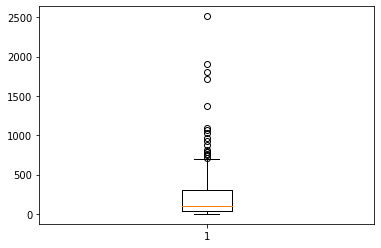

In [87]:
plt.boxplot(trans[1])

plt.show()

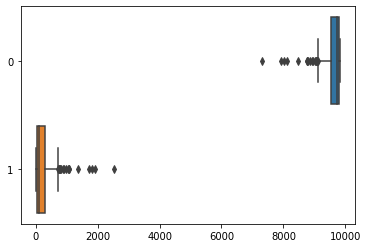

In [88]:
sns.boxplot(data=trans, orient = "h")
#sns.swarmplot(trans[1])
plt.savefig('box2.png', transparent=True, bbox_inches='tight')

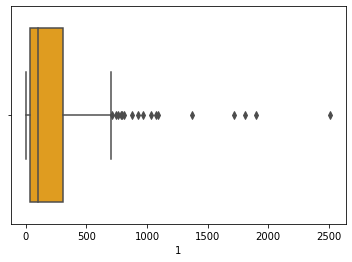

In [89]:
sns.boxplot(trans[1], color ='orange')
plt.savefig('box.png', transparent=True, bbox_inches='tight')

In [90]:
trans

,0,1
whole milk,7322,2513
other vegetables,7932,1903
rolls/buns,8026,1809
soda,8120,1715
yogurt,8463,1372
...,...,...
bags,9831,4
kitchen utensil,9831,4
preservation products,9833,2
baby food,9834,1


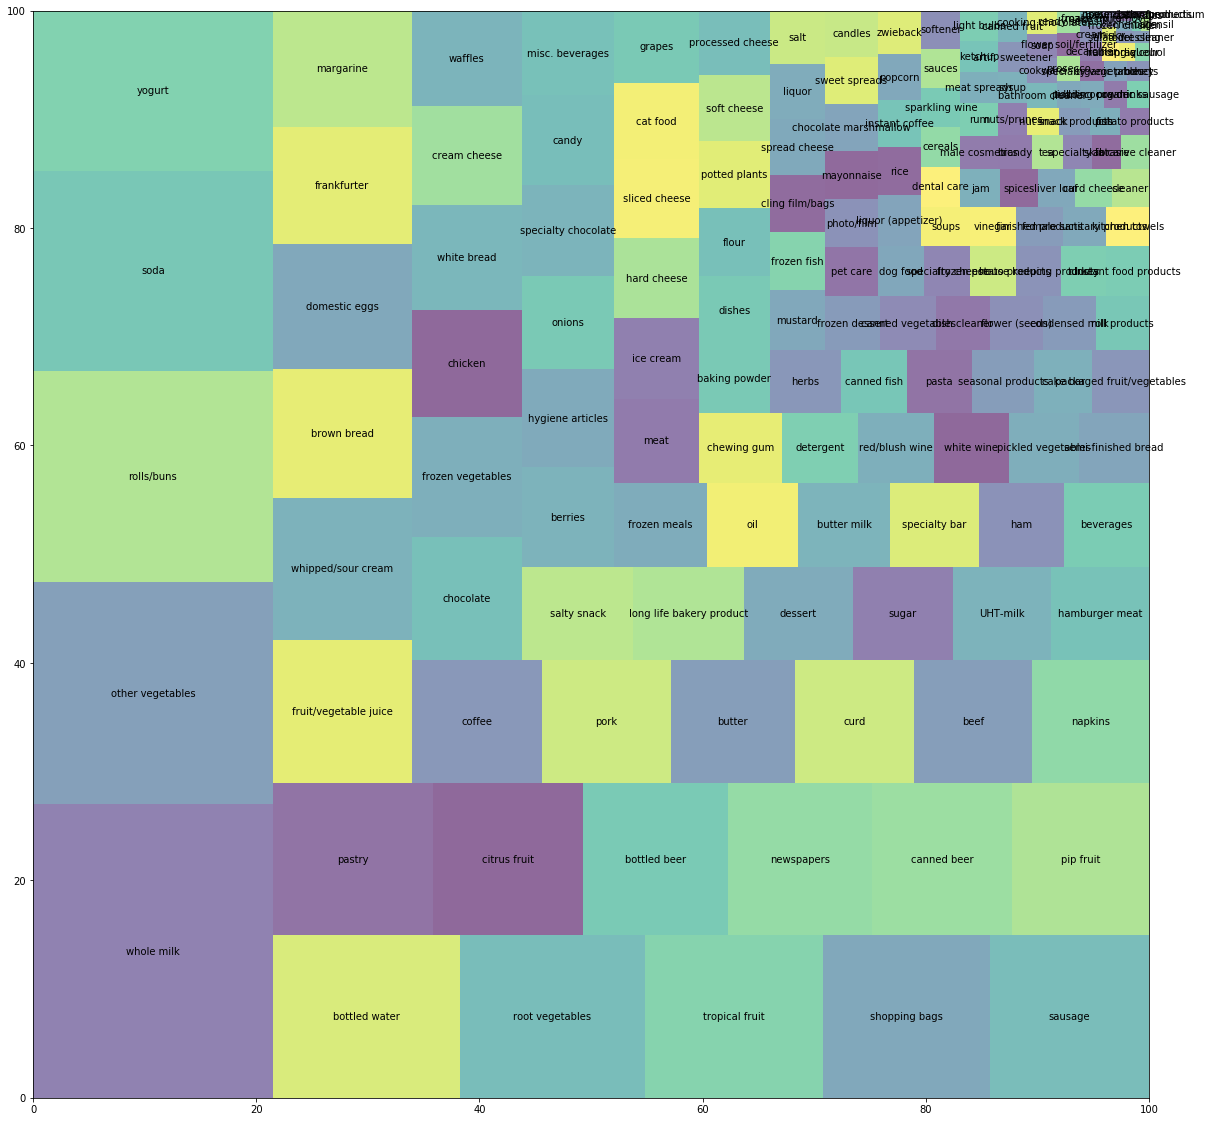

In [91]:
import matplotlib.pyplot as plt
import squarify 
sizes=[2513, 1903, 1809, 1715, 1372, 1087, 1072, 1032, 969, 924, 875, 814, 792, 785, 764, 744, 711, 705, 638, 624, 580, 576, 571, 567, 545, 524, 516, 515, 488, 473, 422, 414, 390, 378, 372, 368, 365, 333, 329, 327, 327, 324, 305, 299, 294, 279, 279, 276, 275, 269, 256, 256, 254, 246, 241, 241, 229, 220, 207, 189, 189, 187, 176, 174, 174, 173, 171, 170, 168, 163, 160, 148, 148, 140, 130, 128, 118, 115, 112, 110, 109, 106, 106, 106, 103, 102, 101, 101, 93, 91, 90, 89, 89, 88, 84, 84, 83, 82, 80, 79, 78, 75, 73, 71, 68, 67, 64, 64, 60, 59, 57, 56, 55, 54, 54, 53, 51, 50, 50, 50, 45, 44, 42, 42, 41, 41, 38, 36, 35, 35, 33, 32, 32, 32, 31, 30, 29, 28, 27, 27, 26, 25, 23, 23, 22, 22, 20, 19, 18, 17, 16, 15, 15, 13, 12, 11, 10, 9, 8, 8, 8, 7, 6, 6, 4, 4, 2, 1, 1]
label=['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'bottled water', 'root vegetables', 'tropical fruit', 'shopping bags', 'sausage', 'pastry', 'citrus fruit', 'bottled beer', 'newspapers', 'canned beer', 'pip fruit', 'fruit/vegetable juice', 'whipped/sour cream', 'brown bread', 'domestic eggs', 'frankfurter', 'margarine', 'coffee', 'pork', 'butter', 'curd', 'beef', 'napkins', 'chocolate', 'frozen vegetables', 'chicken', 'white bread', 'cream cheese', 'waffles', 'salty snack', 'long life bakery product', 'dessert', 'sugar', 'UHT-milk', 'hamburger meat', 'berries', 'hygiene articles', 'onions', 'specialty chocolate', 'candy', 'misc. beverages', 'frozen meals', 'oil', 'butter milk', 'specialty bar', 'ham', 'beverages', 'meat', 'ice cream', 'hard cheese', 'sliced cheese', 'cat food', 'grapes', 'chewing gum', 'detergent', 'red/blush wine', 'white wine', 'pickled vegetables', 'semi-finished bread', 'baking powder', 'dishes', 'flour', 'potted plants', 'soft cheese', 'processed cheese', 'herbs', 'canned fish', 'pasta', 'seasonal products', 'cake bar', 'packaged fruit/vegetables', 'mustard', 'frozen fish', 'cling film/bags', 'spread cheese', 'liquor', 'salt', 'frozen dessert', 'canned vegetables', 'dish cleaner', 'flower (seeds)', 'condensed milk', 'roll products', 'pet care', 'photo/film', 'mayonnaise', 'chocolate marshmallow', 'sweet spreads', 'candles', 'dog food', 'specialty cheese', 'frozen potato products', 'house keeping products', 'turkey', 'Instant food products', 'liquor (appetizer)', 'rice', 'instant coffee', 'popcorn', 'zwieback', 'soups', 'vinegar', 'finished products', 'female sanitary products', 'kitchen towels', 'dental care', 'cereals', 'sparkling wine', 'sauces', 'softener', 'jam', 'spices', 'liver loaf', 'curd cheese', 'cleaner', 'male cosmetics', 'rum', 'meat spreads', 'ketchup', 'light bulbs', 'brandy', 'tea', 'specialty fat', 'skin care', 'abrasive cleaner', 'nuts/prunes', 'syrup', 'artif. sweetener', 'canned fruit', 'nut snack', 'snack products', 'fish', 'potato products', 'bathroom cleaner', 'cookware', 'soap', 'cooking chocolate', 'tidbits', 'pudding powder', 'cocoa drinks', 'organic sausage', 'prosecco', 'flower soil/fertilizer', 'ready soups', 'specialty vegetables', 'organic products', 'honey', 'decalcifier', 'cream', 'frozen fruits', 'hair spray', 'rubbing alcohol', 'liqueur', 'whisky', 'make up remover', 'salad dressing', 'toilet cleaner', 'frozen chicken', 'baby cosmetics', 'kitchen utensil', 'bags', 'preservation products', 'baby food', 'sound storage medium']
#color=['red','blue','green','grey']

f = plt.figure()
squarify.plot(sizes=sizes, label=label, alpha=0.6 )

f.set_figwidth(20)
f.set_figheight(20)


plt.savefig('treemap.png', transparent=True, bbox_inches='tight')
plt.show()

KeyError: 'count'

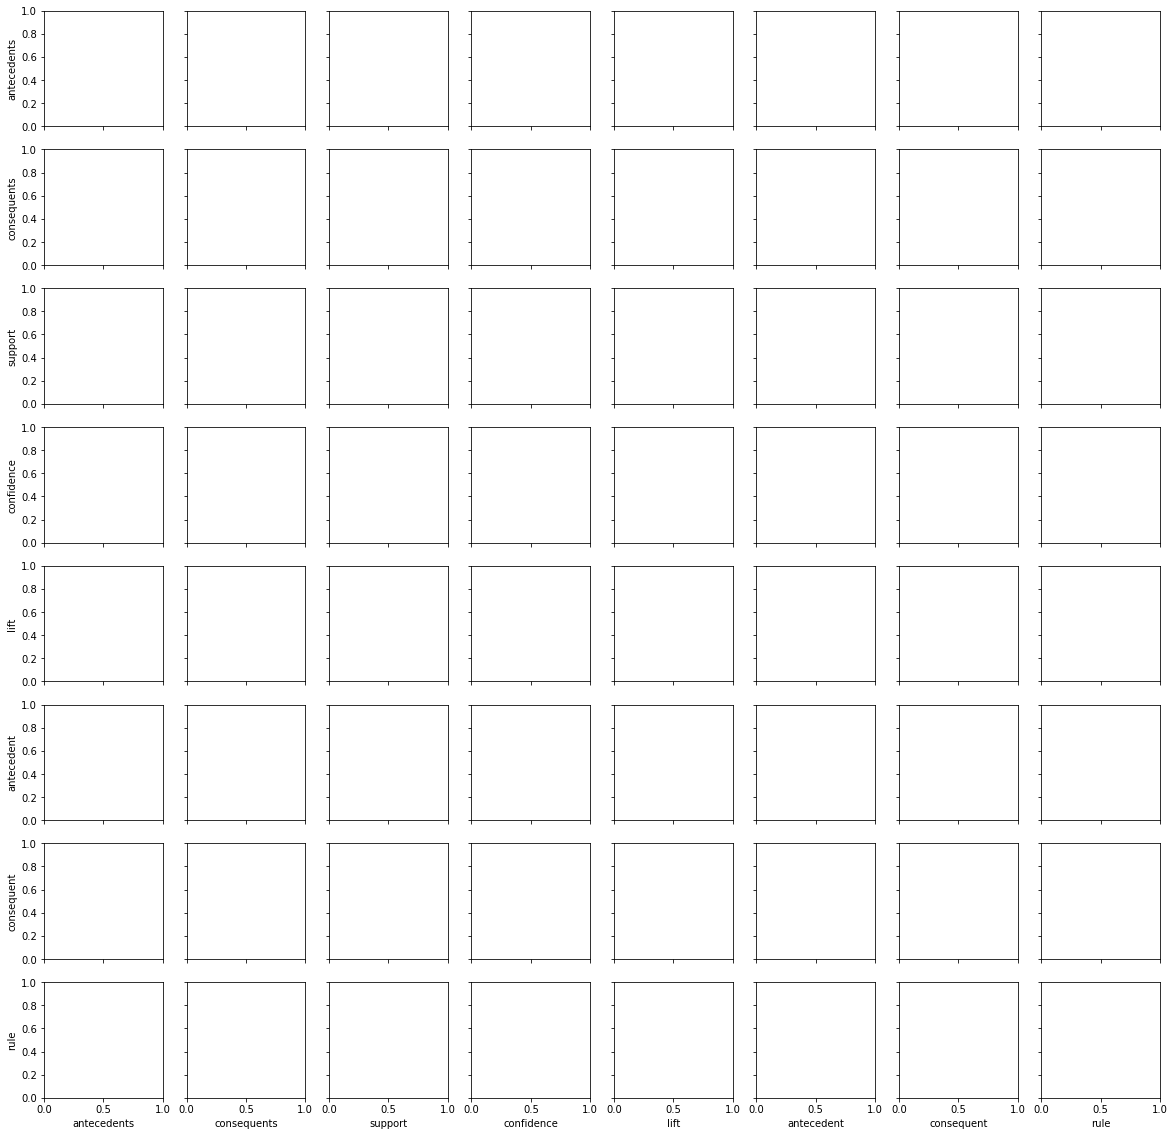

In [92]:
rules = rules.drop(columns = 'antecedent support')
rules = rules.drop(columns = 'consequent support')
rules = rules.drop(columns = 'leverage')
rules = rules.drop(columns = 'conviction')

g = sns.pairplot(rules, hue = "count")
#g.map_diag(sns.histplot, hue=None, color=".3")
g.map(sns.scatterplot)
g.add_legend()
plt.savefig('Splom2.png', transparent=True)

In [ ]:
#from pandas import tools

pd.plotting.parallel_coordinates(rules, class_column='consequents', cols=[ 'support', 'confidence', 'lift'])
plt.savefig('parallel.png', transparent=True)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        dimensions = list([
            dict(#range = [32000,227900],
                 #constraintrange = [100000,150000],
                 label = "support", values = rules['support']),
            dict(#range = [0,700000],
                 label = 'confidence', values = rules['confidence']),
            dict(#tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'consequents', values = rules['consequents']),
            dict(#range = [-1,4],
                 #tickvals = [0,1,2,3],
                 label = 'lift', values = rules['lift'])])
    )
)
fig.show()

In [ ]:
import networkx as nx
dataset['food'] = 'Food'
food = dataset.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()